<a href="https://colab.research.google.com/github/farshid101/NLP/blob/main/NLP_Labeling_with_VADER_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library


In [1]:
import pandas as pd


## Importing DataSet

DataSet lint =
[link text](https://github.com/farshid101/NLP/blob/main/VADER-Sentiment-Analysis/MatroData%20emoji%20to%20text%20.csv)



In [2]:
!wget https://github.com/farshid101/NLP/blob/main/VADER-Sentiment-Analysis/MatroData%20emoji%20to%20text%20.csv

--2023-09-10 14:53:52--  https://github.com/farshid101/NLP/blob/main/VADER-Sentiment-Analysis/MatroData%20emoji%20to%20text%20.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629118 (614K) [text/plain]
Saving to: ‘MatroData emoji to text .csv’

MatroData emoji to  100%[===================>] 614.37K  --.-KB/s    in 0.06s   

2023-09-10 14:53:53 (9.35 MB/s) - ‘MatroData emoji to text .csv’ saved [629118/629118]



In [159]:
df=pd.read_csv("MatroData emoji to text .csv")
df.head()

,comment,Comment to English,Emoji to text
0,ধন্যবাদ ভাই। এয়ারপোর্টে যেতে হলে উত্তরা কোন...,thanks brother. If you want to go to the airpo...,thanks brother. If you want to go to the airp...
1,আশা করি সেপ্টেম্বরের প্রথম সপ্তাহে দেখতে পাব...,hope to see the first week of September. With,hope to see the first week of September. With
2,কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট থেকে দূর...,"will not be easy. All away from the airport, ...","will not be easy. All away from the airport, ..."
3,Agargaon to Uttara,Agargaon to Uttara,Agargaon to Uttara
4,nice to see you in Bangladesh again. You reall...,nice to see you in Bangladesh again. You reall...,nice to see you in Bangladesh again. You reall...


In [160]:
df.count()

comment               2184
Comment to English    2184
Emoji to text         2184
dtype: int64

In [161]:
df_new=pd.read_csv("new Data EMO.csv")
df_new.head()

,comment,Comment to English,Emoji to text
0,“বিশ্ব মুক্ত গণমাধ্যম সূচকে পাকিস্তান ভারত ও আ...,"""Pakistan is also under India and Afghanistan ...","""Pakistan is also under India and Afghanistan ..."
1,❤fan দিলে ভালোহয়,It is good,It is good
2,👍👍🇧🇩,👍👍🇧🇩,thumbs upthumbs upflag: Bangladesh
3,🤨,🤨,face with raised eyebrow
4,😂,😂,face with tears of joy


In [162]:
df_new.count()

comment               288
Comment to English    288
Emoji to text         288
dtype: int64

In [163]:
288+2184

2472

In [164]:
new_df = pd.concat([df, df_new], ignore_index=True)

In [165]:
new_df.count()

comment               2472
Comment to English    2472
Emoji to text         2472
dtype: int64

In [166]:
df=new_df.copy()

In [167]:
df.count()

comment               2472
Comment to English    2472
Emoji to text         2472
dtype: int64

## Analyzing DataSet

In [168]:
df.value_counts()

comment                                                           Comment to English                                                         Emoji to text                                                            
চালু মেট্রোরেল ষ্টেশনে টয়লেট ব্যবহারে টাকা নিচ্ছে                Taking money to use the toilet at Metrorail Station                        Taking money to use the toilet at Metrorail Station                          8
Mr Triple R Army OP                                               Mr Triple R Army OP                                                        Mr Triple R Army OP                                                          4
পরিচালকে কেন প্রশ্ন করা হয় না যে পাবলিক টয়লেটে কেন টাকা নেয়া হয়?  Why is the director question why the money is taken in the public toilet?  Why is the director question why the money is taken in the public toilet?    4
❤                                                                 ❤                                                          

In [169]:
df.count()

comment               2472
Comment to English    2472
Emoji to text         2472
dtype: int64

## Removing duplicating in pandas dataset

In [170]:
df_no_duplicates = df.drop_duplicates()

In [171]:
df_no_duplicates.sample(5)

,comment,Comment to English,Emoji to text
359,Good video,Good video,Good video
602,MRT-2 & MRT-4 সম্পর্কে বিস্তারিত ভিডিও চাই।,Want a detailed video about MRT-2 & MRT-4.,Want a detailed video about MRT-2 & MRT-4.
1138,আমি বাইরের কয়েক দেশের মেট্রো এবং সিটি রেলে উঠে...,I got up in the Metro and City Rail of a few c...,I got up in the Metro and City Rail of a few c...
462,Its pleasure for ourself that many foreigner v...,Its pleasure for ourself that many foreigner v...,Its pleasure for ourself that many foreigner v...
496,Kono kichur unnowon kore lav nei. Age Manusher...,Kono Kichur Unowon Kore Lav Nei. Age manusher ...,Kono Kichur Unowon Kore Lav Nei. Age manusher ...


In [172]:
df_no_duplicates.count()

comment               2250
Comment to English    2250
Emoji to text         2250
dtype: int64

# Labeling DataSet

# VADER-Sentiment-Analysis

For details:
[GitHub Link](https://github.com/cjhutto/vaderSentiment?fbclid=IwAR1K1sEvL0VVJEqO5s3FeTTM5UILz5hH7n_tgSxdfX-DfMxGoKqfAnNIfz8https://)




In [173]:
!pip install vaderSentiment

In [16]:
!pip install --upgrade vaderSentiment

## Example Code of VaderSentiment

In [178]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    #note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
    #from vaderSentiment import SentimentIntensityAnalyzer

# --- examples -------
sentences = ["nice to see you in Bangladesh again. You really like Bangladesh?!!  I like your video  very much.",  # positive sentence example
             "In the country of 1 crore, the bucket of water is just removed from the Metrorail pond of this type.",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "Alhamdhula", # booster words handled correctly (sentiment intensity adjusted)
             "LOL u r stupid ,but very good boy",  # emphasis for ALLCAPS handled
             "Without off Friday", # combination of signals - VADER appropriately adjusts intensity
             "Bangkok BTS is not air-conditioned", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

nice to see you in Bangladesh again. You really like Bangladesh?!!  I like your video  very much. {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.8261}
In the country of 1 crore, the bucket of water is just removed from the Metrorail pond of this type. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Alhamdhula------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
LOL u r stupid ,but very good boy-------------------------------- {'neg': 0.16, 'neu': 0.363, 'pos': 0.477, 'compound': 0.6549}
Without off Friday----------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Bangkok BTS is not air-conditioned------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'ne

## Applying the Code

In [179]:
df_text=df_no_duplicates['Emoji to text']

#df_text = pd.DataFrame(df_text)
df_text.sample(5)

1           hope to see the first week of September. With
1590                                           The nation
882     We don't need mato rail because of we don't ha...
890     Welcome again Guys.. Love to you both...red he...
1900                            Honorable Prime Minister.
Name: Emoji to text, dtype: object

In [180]:
df_text.head()

0     thanks brother. If you want to go to the airp...
1        hope to see the first week of September. With
2     will not be easy. All away from the airport, ...
3                                   Agargaon to Uttara
4    nice to see you in Bangladesh again. You reall...
Name: Emoji to text, dtype: object

## Making a Function


In [20]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.5 MB/s eta 0:00:00


In [181]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

def analyze_sentiment(list):
  """
  this function will take a list . Predict the label .
  """
  analyzer = SentimentIntensityAnalyzer()
  for sentence in df_text:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))
  return vs



In [182]:
df_no_duplicates.head()

,comment,Comment to English,Emoji to text
0,ধন্যবাদ ভাই। এয়ারপোর্টে যেতে হলে উত্তরা কোন...,thanks brother. If you want to go to the airpo...,thanks brother. If you want to go to the airp...
1,আশা করি সেপ্টেম্বরের প্রথম সপ্তাহে দেখতে পাব...,hope to see the first week of September. With,hope to see the first week of September. With
2,কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট থেকে দূর...,"will not be easy. All away from the airport, ...","will not be easy. All away from the airport, ..."
3,Agargaon to Uttara,Agargaon to Uttara,Agargaon to Uttara
4,nice to see you in Bangladesh again. You reall...,nice to see you in Bangladesh again. You reall...,nice to see you in Bangladesh again. You reall...


In [183]:
len(df_text)

2250

In [184]:
predict_df=df_no_duplicates.copy()
predict_df.sample(5)

,comment,Comment to English,Emoji to text
1724,ফ্রাইডে তে খোলা থাকে?,Open on Friday?,Open on Friday?
2164,"সুন্দর, দেখতে খুব আধুনিক। বাংলাদেশের মানুষকে অ...","Beautiful, very modern to look. Congratulation...","Beautiful, very modern to look. Congratulation..."
1241,উফ অসাধারণ। কবে যে বাংলাদেশ যাব। বাংলাদেশ সরকা...,Oops are awesome. When will I go to Bangladesh...,Oops are awesome. When will I go to Bangladesh...
1409,খাগড়াছড়ি,Razor,Razor
2177,আমি আশা করি কোন দুর্ঘটনা নেই।,I hope there is no accident.,I hope there is no accident.



```
# This is formatted as code
analyzer = SentimentIntensityAnalyzer()
for sentence in df_text:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

```



In [185]:
# This is formatted as code
analyzer = SentimentIntensityAnalyzer()
for sentence in df_text:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

 thanks brother. If you want to go to the airport, you can easily go to any level of Uttara, please ??? {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.8146}
 hope to see the first week of September. With------------------- {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
 will not be easy. All away from the airport, but you can get down to Uttara Center station and become a bunia with auto. {'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'compound': -0.1786}
 Agargaon to Uttara---------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nice to see you in Bangladesh again. You really like Bangladesh?!!  I like your video  very much. {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.8261}
Your Bengali speaking is very good smiling face with smiling eyessmiling face with smiling eyessmiling face with smiling eyes. I also learn some Romanian beaming face with smiling eyesbeaming face with smiling eyesbeaming face with smiling eyes 

In [186]:
df_text

0        thanks brother. If you want to go to the airp...
1           hope to see the first week of September. With
2        will not be easy. All away from the airport, ...
3                                      Agargaon to Uttara
4       nice to see you in Bangladesh again. You reall...
                              ...                        
2467    Hachan Mahmud can tell where he is dealing wit...
2468                                   Hi ray Bengali ray
2469                               Hi ray advertising ray
2470                                       Alas people !!
2471    Hoothat does not require 100% discount on shop...
Name: Emoji to text, Length: 2250, dtype: object

In [187]:
# This is formatted as code

predict=[]
analyzer = SentimentIntensityAnalyzer()
for sentence in df_text:
    vs = analyzer.polarity_scores(sentence)
    predict.append(str(vs))
    print("{:-<65} {}".format(sentence, str(vs)))

 thanks brother. If you want to go to the airport, you can easily go to any level of Uttara, please ??? {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.8146}
 hope to see the first week of September. With------------------- {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
 will not be easy. All away from the airport, but you can get down to Uttara Center station and become a bunia with auto. {'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'compound': -0.1786}
 Agargaon to Uttara---------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nice to see you in Bangladesh again. You really like Bangladesh?!!  I like your video  very much. {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.8261}
Your Bengali speaking is very good smiling face with smiling eyessmiling face with smiling eyessmiling face with smiling eyes. I also learn some Romanian beaming face with smiling eyesbeaming face with smiling eyesbeaming face with smiling eyes 

In [188]:
predict

["{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.8146}",
 "{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}",
 "{'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'compound': -0.1786}",
 "{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",
 "{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.8261}",
 "{'neg': 0.0, 'neu': 0.542, 'pos': 0.458, 'compound': 0.9735}",
 "{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",
 "{'neg': 0.261, 'neu': 0.522, 'pos': 0.216, 'compound': -0.1531}",
 "{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}",
 "{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",
 "{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}",
 "{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'compound': 0.6892}",
 "{'neg': 0.089, 'neu': 0.63, 'pos': 0.28, 'compound': 0.886}",
 "{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.3182}",
 "{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",
 "{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound':

In [190]:
predict_df['prediction']= predict

In [191]:
predict_df['prediction'].head(5)

0    {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp...
1    {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...
2    {'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp...
Name: prediction, dtype: object

In [192]:
predict_df.head()

,comment,Comment to English,Emoji to text,prediction
0,ধন্যবাদ ভাই। এয়ারপোর্টে যেতে হলে উত্তরা কোন...,thanks brother. If you want to go to the airpo...,thanks brother. If you want to go to the airp...,"{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp..."
1,আশা করি সেপ্টেম্বরের প্রথম সপ্তাহে দেখতে পাব...,hope to see the first week of September. With,hope to see the first week of September. With,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp..."
2,কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট থেকে দূর...,"will not be easy. All away from the airport, ...","will not be easy. All away from the airport, ...","{'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'comp..."
3,Agargaon to Uttara,Agargaon to Uttara,Agargaon to Uttara,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,nice to see you in Bangladesh again. You reall...,nice to see you in Bangladesh again. You reall...,nice to see you in Bangladesh again. You reall...,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp..."


# Analyzing the prediction columns

In [197]:
df_a= predict_df["prediction"]
df_a.sample(10)

105     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2467    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1359    {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...
1348    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
507     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1199    {'neg': 0.124, 'neu': 0.785, 'pos': 0.091, 'co...
151     {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...
2270    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1468    {'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'comp...
449     {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...
Name: prediction, dtype: object

In [198]:
df_a.value_counts()

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}            867
{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}      13
{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}      12
{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}        11
{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}       9
                                                                ... 
{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.9186}       1
{'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'compound': 0.743}        1
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.5994}       1
{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.5994}       1
{'neg': 0.573, 'neu': 0.427, 'pos': 0.0, 'compound': -0.3987}      1
Name: prediction, Length: 1110, dtype: int64

In [199]:
def get_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [200]:
compound_list = []

# Assuming df_a is a Pandas Series
for sentiment_str in df_a:
    sentiment_dict = eval(sentiment_str)  # Convert the string to a dictionary
    compound_value = sentiment_dict['compound']
    compound_list.append(compound_value)

# Now, compound_list contains the 'compound' values
print(compound_list)

# Now you can apply the get_sentiment_label function to create another list
sentiment_labels = [get_sentiment_label(compound_score) for compound_score in compound_list]

# Assuming you want to add the sentiment_labels to a DataFrame called predict_df
predict_df["Compound to sentiment"] = sentiment_labels

[0.8146, 0.4404, -0.1786, 0.0, 0.8261, 0.9735, 0.0, -0.1531, 0.3612, 0.0, 0.5859, 0.6892, 0.886, 0.3182, 0.0, 0.0, 0.3182, 0.0, 0.2732, 0.0, 0.0, 0.0, 0.6369, 0.6696, 0.8687, 0.0, 0.0, 0.4939, 0.6369, 0.6369, 0.6369, 0.0, 0.4404, 0.4215, 0.0, 0.4939, 0.6369, 0.6369, 0.9201, 0.0, 0.0, 0.6369, 0.6369, 0.0, 0.6369, 0.6369, 0.6369, 0.6369, 0.0, 0.6369, 0.2023, 0.0, 0.0, 0.4215, 0.4404, 0.4404, 0.4404, 0.0, 0.3612, 0.0, 0.6597, 0.4019, 0.7845, 0.7297, 0.0, 0.4588, 0.6369, 0.6696, 0.0, 0.0, 0.0, 0.8074, 0.8074, 0.0258, 0.0, 0.4588, 0.0, 0.743, 0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4939, 0.0, 0.0, 0.7264, 0.0, 0.0, 0.6369, 0.0, 0.0, 0.0, 0.0, -0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.34, -0.5661, 0.9068, 0.0, 0.25, 0.0, 0.0, -0.3612, -0.8074, 0.0, 0.4404, 0.6696, 0.8402, 0.4754, 0.4019, 0.8779, 0.0, -0.5256, 0.0, 0.0, 0.0, 0.9081, 0.5574, 0.0, 0.0, -0.25, 0.0, 0.0, 0.0, 0.0, 0.3818, 0.6369, 0.7003, 0.0, 0.0, 0.4939, 0.0, 0.0, 0.8834, 0.0, 0.0, 0.8779, 0.8225, 0.5859, 0.0,

In [201]:
predict_df.head()

,comment,Comment to English,Emoji to text,prediction,Compound to sentiment
0,ধন্যবাদ ভাই। এয়ারপোর্টে যেতে হলে উত্তরা কোন...,thanks brother. If you want to go to the airpo...,thanks brother. If you want to go to the airp...,"{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp...",positive
1,আশা করি সেপ্টেম্বরের প্রথম সপ্তাহে দেখতে পাব...,hope to see the first week of September. With,hope to see the first week of September. With,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",positive
2,কোনটাই সহজ হবে না। সবটাই এয়ারপোর্ট থেকে দূর...,"will not be easy. All away from the airport, ...","will not be easy. All away from the airport, ...","{'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'comp...",negative
3,Agargaon to Uttara,Agargaon to Uttara,Agargaon to Uttara,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
4,nice to see you in Bangladesh again. You reall...,nice to see you in Bangladesh again. You reall...,nice to see you in Bangladesh again. You reall...,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp...",positive




```
max_sentiment_label_list = []  # Corrected variable name
max_sentiment_value_list = []  # Corrected variable name
result_list = []

for index, row in df_a.iterrows():
    sentiment_dict = row.to_dict()  # Convert the row to a dictionary
    max_sentiment_label = max(sentiment_dict, key=sentiment_dict.get)
    max_sentiment_value = sentiment_dict[max_sentiment_label]
    
    max_sentiment_label_list.append(max_sentiment_label)
    max_sentiment_value_list.append(max_sentiment_value)

result_df = pd.DataFrame({
    "Max_Sentiment_Label": max_sentiment_label_list,
    "Max_Sentiment_Value": max_sentiment_value_list
})

print(result_df)
```



In [202]:
max_sentiment_label_list=[]
max_sentiment_value_list=[]
result_list = []

for index, sentiment_str in df_a.items():
    sentiment_dict = eval(sentiment_str)  # Convert the string to a dictionary
    max_sentiment_label = max(sentiment_dict, key=sentiment_dict.get)
    max_sentiment_value = sentiment_dict[max_sentiment_label]
    max_sentiment_label_list.append(max_sentiment_label)
    max_sentiment_value_list.append(max_sentiment_value)

    result_list.append((max_sentiment_label, max_sentiment_value))

# Create a DataFrame from the result_list
result_df = pd.DataFrame(result_list, columns=["Max_Sentiment_Label", "Max_Sentiment_Value"])

# Display the DataFrame
print(result_df)

     Max_Sentiment_Label  Max_Sentiment_Value
0               compound               0.8146
1                    neu               0.7340
2                    neu               0.9310
3                    neu               1.0000
4               compound               0.8261
...                  ...                  ...
2245                 neu               1.0000
2246                 neu               1.0000
2247                 neu               1.0000
2248                 neg               0.5730
2249                 neu               1.0000

[2250 rows x 2 columns]


In [203]:
predict_df['max_sentiment_label']=max_sentiment_label_list
predict_df['max_sentiment_value']=max_sentiment_value_list

In [204]:
result_df.value_counts()

Max_Sentiment_Label  Max_Sentiment_Value
neu                  1.0000                 867
compound             0.6369                  30
pos                  1.0000                  23
neu                  0.5800                  14
pos                  0.6770                  14
                                           ... 
compound             0.9419                   1
                     0.9422                   1
                     0.9423                   1
                     0.9432                   1
                     0.8966                   1
Length: 591, dtype: int64

In [205]:
predict_df.sample(5)

,comment,Comment to English,Emoji to text,prediction,Compound to sentiment,max_sentiment_label,max_sentiment_value
1605,দেশটা অনেক ভালো হয়েছে কিন্তু কিছু লোক যদি ভাল...,The country has been much better but if some p...,The country has been much better but if some p...,"{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compou...",positive,compound,0.8689
106,২০ বিশ কিলোমিটার রাস্তায় 14 টা স্টেশন। হাস্যকর,Twenty -two kilometers on the street 14 statio...,Twenty -two kilometers on the street 14 statio...,"{'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'comp...",negative,neu,0.7620
942,Wow You used nupur-2 by topu as background mus...,Wow You used nupur-2 by topu as background mus...,Wow You used nupur-2 by topu as background mus...,"{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compou...",positive,neu,0.7100
648,Please change colour of this metro like blue,Please change colour of this metro like blue,Please change colour of this metro like blue,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",positive,compound,0.5859
1693,পুরান ঢাকা জা আসে তাই রেখে বাস ট্রাক আগুলা ঢাক...,Old Dhaka Ja comes so the bus truck needs to b...,Old Dhaka Ja comes so the bus truck needs to b...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,neu,1.0000


In [206]:
predict_df["max_sentiment_label"].value_counts()

neu         1682
compound     415
pos          126
neg           27
Name: max_sentiment_label, dtype: int64

<Axes: ylabel='max_sentiment_label'>

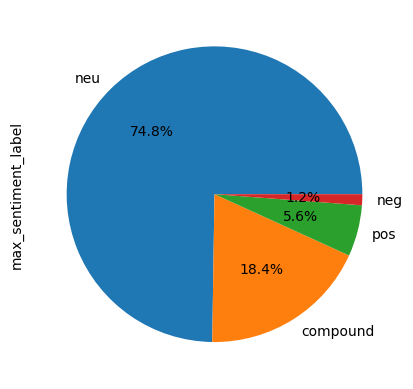

In [207]:
predict_df["max_sentiment_label"].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='max_sentiment_label'>

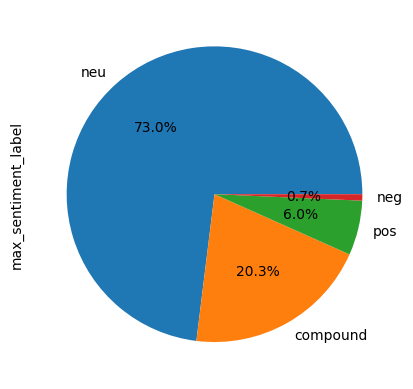

In [138]:
predict_df["max_sentiment_label"].value_counts().plot(kind='pie', autopct='%1.1f%%')



<Axes: ylabel='Compound to sentiment'>

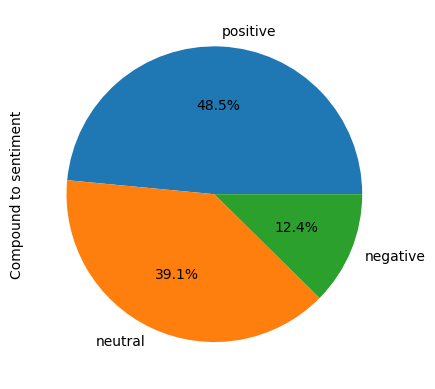

In [208]:
#new one
predict_df["Compound to sentiment"].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='Compound to sentiment'>

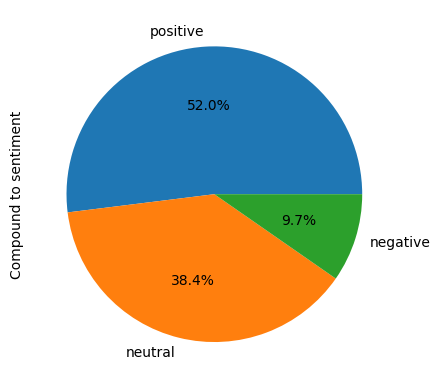

In [139]:
# old one
predict_df["Compound to sentiment"].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Label dataset
Githube link =
[link ](https://github.com/farshid101/NLP/blob/main/VADER-Sentiment-Analysis/MatroData%20predict%20label_part_2.csv)


In [209]:
from google.colab import files



# Save the DataFrame to a CSV file
predict_df.to_csv('MatroData final.csv', index=False)  # Replace 'my_dataframe.csv' with your desired file name

# Download the CSV file
files.download('MatroData final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



```
from google.colab import files



# Save the DataFrame to a CSV file
predict_df.to_csv('MatroData predict label_part_2.csv', index=False)  # Replace 'my_dataframe.csv' with your desired file name

# Download the CSV file
files.download('MatroData predict label_part_2.csv')
```

